In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import math
import random

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df['id'].value_counts()

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [5]:
df.loc[df['id']==795000620]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17588,795000620,9/24/2014,115000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17589,795000620,12/15/2014,124000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17590,795000620,3/11/2015,157000.0,3,1.0,1080,6250,1.0,NaN,0.0,...,5,1080,0.0,1950,NaN,98168,47.5045,-122.33,1070,6250


In [6]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [7]:
df.loc[df['bedrooms']==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [8]:
df['bedrooms'].replace(to_replace = 33, value =3 , inplace=True)

In [9]:
df.loc[df['id']==2402100895]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,3,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [10]:
df['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [11]:
pd.options.display.max_columns=100

In [12]:
df.sort_values(by=['yr_built'],ascending=False)
# df['yr_built'].value_counts()
df.loc[df['yr_built']==1900]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
14,1175000570,3/12/2015,530000.0,5,2.00,1810,4850,1.5,0.0,0.0,3,7,1810,0.0,1900,0.0,98107,47.6700,-122.394,1360,4850
115,3626039325,11/21/2014,740500.0,3,3.50,4380,6350,2.0,0.0,0.0,3,8,2780,?,1900,NaN,98117,47.6981,-122.368,1830,6350
498,9274202270,8/18/2014,625000.0,2,1.50,1490,5750,1.5,0.0,0.0,4,7,1190,300.0,1900,0.0,98116,47.5872,-122.390,1590,4025
537,5694500105,12/4/2014,595000.0,2,2.00,1510,4000,1.0,0.0,0.0,4,7,1010,500.0,1900,0.0,98103,47.6582,-122.345,1920,4000
703,7011200260,12/19/2014,485000.0,4,2.00,1400,3600,1.0,0.0,0.0,3,7,1100,300.0,1900,0.0,98119,47.6385,-122.370,1630,2048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19048,1702901340,6/13/2014,718500.0,3,2.00,2910,6600,2.0,0.0,0.0,4,7,1920,990.0,1900,NaN,98118,47.5576,-122.281,1370,5500
19122,3388110230,7/29/2014,179000.0,4,1.75,1790,7175,1.5,0.0,0.0,3,6,1410,380.0,1900,NaN,98168,47.4963,-122.318,1790,8417
19304,4083302225,10/14/2014,850000.0,4,3.00,2550,3784,1.5,0.0,0.0,4,8,1750,800.0,1900,0.0,98103,47.6559,-122.338,2100,4560
19370,2420069042,4/24/2015,240000.0,3,2.00,1553,6550,1.0,NaN,0.0,3,7,1553,0.0,1900,NaN,98022,47.2056,-121.994,1010,10546


In [13]:
df_test = df.duplicated(subset=None, keep='first')

In [14]:
df_test.value_counts()

False    21597
dtype: int64

In [15]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [16]:
df['waterfront'].unique()

array([nan,  0.,  1.])

In [17]:
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [18]:
df['waterfront'].fillna(value=0,inplace=True)

In [19]:
df['waterfront'].value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [20]:
df['yr_renovated'].fillna(value=0,inplace=True)

In [21]:
df.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view             63
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [22]:
df.dropna(subset=['view'],inplace=True)

In [23]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [24]:
df['sqft_basement'].replace(to_replace = '?', value = df['sqft_living'] - df['sqft_above'], inplace=True)

In [25]:
df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', 0, '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       380, 1600, '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0', '860.0',
       '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0', '1200.0',
       '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0', 1100,
       '280.0', '870.0', '1100.0', '460.0', '1400.0', 1320, '660.0',
       '1220.0', '900.0', '420.0', '1580.0', '1380.0', '475.0

In [26]:
df['sqft_basement'] = df['sqft_basement'].astype("float32")

In [27]:
df1 = df.drop(columns=['date'])

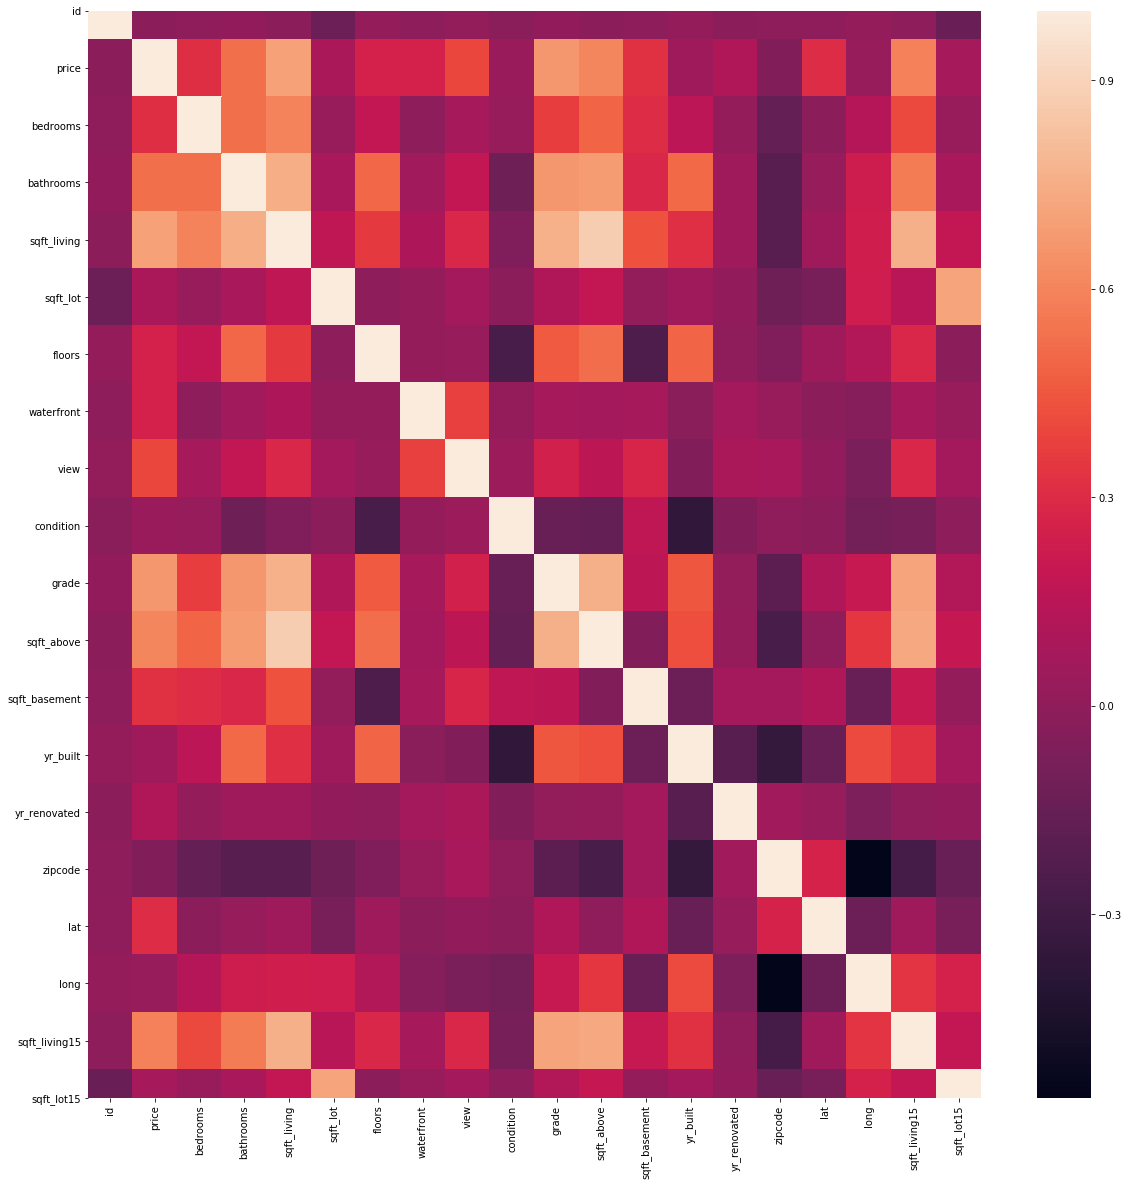

In [28]:
plt.figure(figsize = (20,20))
sns.heatmap(df1.corr())

In [29]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingRegressor

import gc; gc.enable()

import warnings
warnings.filterwarnings("ignore")

In [30]:
target = "price"
used_cols = [c for c in df1.columns.to_list() if c not in [target]]

X = df1[used_cols]
y = df1[target]

In [31]:
df.corr()[target].abs().sort_values(ascending=False)

price            1.000000
sqft_living      0.701587
grade            0.668307
sqft_above       0.605695
sqft_living15    0.585304
bathrooms        0.525053
view             0.395734
sqft_basement    0.321816
bedrooms         0.315229
lat              0.307868
waterfront       0.259220
floors           0.257052
yr_renovated     0.117982
sqft_lot         0.090338
sqft_lot15       0.083189
yr_built         0.054273
zipcode          0.053620
condition        0.035393
long             0.022417
id               0.017392
Name: price, dtype: float64

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [60]:
# Baseline : Linear (OLS) Regression
scaler = RobustScaler()
lr = LinearRegression()
pipe1 = make_pipeline(scaler, lr)


# Quick helper functions
def model_evaluate(old_pipe, bagging=True):
    if bagging:
        pipe = BaggingRegressor(old_pipe, n_estimators=3)
    else:
        pipe = old_pipe
        
    metrics = ['r2', 
               'neg_mean_absolute_error', 
               'neg_mean_squared_error']
    
    # cross validate returns a dictionary object
    # * https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
    preds = cross_validate(pipe, X, y, 
                           cv=3, n_jobs=-1, 
                           scoring=metrics,
                           return_estimator=True)

    print("-"*60)
    for i, tag in enumerate(preds):
        if 'time' not in tag and 'estimator' not in tag:
            print(tag, ":\n\t\t\t\t\t", 
                  "%.4f" % preds[tag].mean(), 
                  "+/-", 
                  "%.4f" % preds[tag].std())
            if i % 2 == 0:
                print()
                print("-"*60)
                
    if bagging:
        coeffs = []
        for i in range(3):
            for j in range(3):
                estimator = preds['estimator'][i].estimators_[j]
                modeling_step = estimator.steps[1][0]
                coef = estimator.named_steps[modeling_step].coef_
                coeffs.append(coef)

        coeffs = [(
            "Beta_%s" % (i+1), 
            "%.4f" % np.mean(coeffs, axis=0)[i],
            "%.4f" % np.std(coeffs, axis=0)[i],
        ) for i in range(len(used_cols))]
        for coeff in coeffs:
            print(coeff[0], ":\t", coeff[1], "+/-", coeff[2])

        print()
        print("-"*60)
        
    return preds['estimator'] # this is a list of pipelines


def model_predict(pipe):
    y_preds = [pipe[i].predict(X) for i in range(len(pipe))]
    y_pred = np.mean(y_preds, axis=0)
    return y_pred


# def plot_residuals():
#     SIZE = (20,8)

#     plt.figure(figsize=SIZE)
#     sns.scatterplot(y_pred, (y - y_pred))
#     sns.lineplot(y_pred, [0]*len(y_pred), color='red')
#     sns.lineplot(y_pred, [1]*len(y_pred), color='green')
#     sns.lineplot(y_pred, [-1]*len(y_pred), color='green')
#     plt.xlabel("Predicted")
#     plt.ylabel("Residual")
#     plt.show()

#     plt.figure(figsize=SIZE)
#     plt.hist(y - y_pred, bins=20)
#     # TODO: Add vertical lines at x=-1,0,1
#     plt.show()


pipe1 = model_evaluate(pipe1) # returns a list of pipelines
y_pred = model_predict(pipe1)
# plot_residuals()

------------------------------------------------------------
test_r2 :
					 0.7345 +/- 0.0156
test_neg_mean_absolute_error :
					 -115562.5230 +/- 1225.3233

------------------------------------------------------------
test_neg_mean_squared_error :
					 -35510290543.8850 +/- 1682579968.8554
Beta_1 :	 120246.4939 +/- 5180.1015
Beta_2 :	 69358.8527 +/- 2875.6427
Beta_3 :	 118506.0911 +/- 4686.4983
Beta_4 :	 150296.9575 +/- 42742.4628
Beta_5 :	 55851.9818 +/- 2841.4120
Beta_6 :	 26291.7834 +/- 3281.8637
Beta_7 :	 -75290.7852 +/- 2752.0445
Beta_8 :	 57693551005.3979 +/- 10734490026.6600
Beta_9 :	 -16443197672.9146 +/- 2114499234.2574
Beta_10 :	 68185.5519 +/- 15680.5249
Beta_11 :	 645097.6872 +/- 69420.3969
Beta_12 :	 -60215.0484 +/- 5405.2760
Beta_13 :	 105489751730.1012 +/- 12753221759.4751
Beta_14 :	 106953357226.9713 +/- 12281210622.8039
Beta_15 :	 36120668746.5881 +/- 3946377668.7962
Beta_16 :	 -537429.5176 +/- 81524.5044
Beta_17 :	 289222.3416 +/- 47588.5997
Beta_18 :	 -39993.8822

------------------------------------------------------------
test_r2 :
					 0.6675 +/- 0.0263
test_neg_mean_absolute_error :
					 -130927.0005 +/- 971.0251

------------------------------------------------------------
test_neg_mean_squared_error :
					 -44473693516.0235 +/- 2991363231.1889
Beta_1 :	 329690.2338 +/- 10816.2593
Beta_2 :	 88375.6588 +/- 3764.8539
Beta_3 :	 -102320.8179 +/- 10161.3133
Beta_4 :	 98841.5429 +/- 36647.2959
Beta_5 :	 63916.1552 +/- 7027.8161
Beta_6 :	 -65039.9858 +/- 5471.0420
Beta_7 :	 -46839.4008 +/- 3679.1542
Beta_8 :	 349443.8351 +/- 10123.4395
Beta_9 :	 -84834.0610 +/- 12967.4504
Beta_10 :	 42251.0921 +/- 30773.2006
Beta_11 :	 564183.3624 +/- 95420.2594
Beta_12 :	 -25060.7357 +/- 3941.7681
Beta_13 :	 -35346.8303 +/- 2347.0948
Beta_14 :	 -51373.9379 +/- 3265.1221
Beta_15 :	 52555.4184 +/- 3269.8836
Beta_16 :	 -491732.6133 +/- 158432.9928
Beta_17 :	 303089.9441 +/- 94600.5160
Beta_18 :	 -42986.3182 +/- 19757.4117
Beta_19 :	 -52273.0591 +/- 4456.2103

---

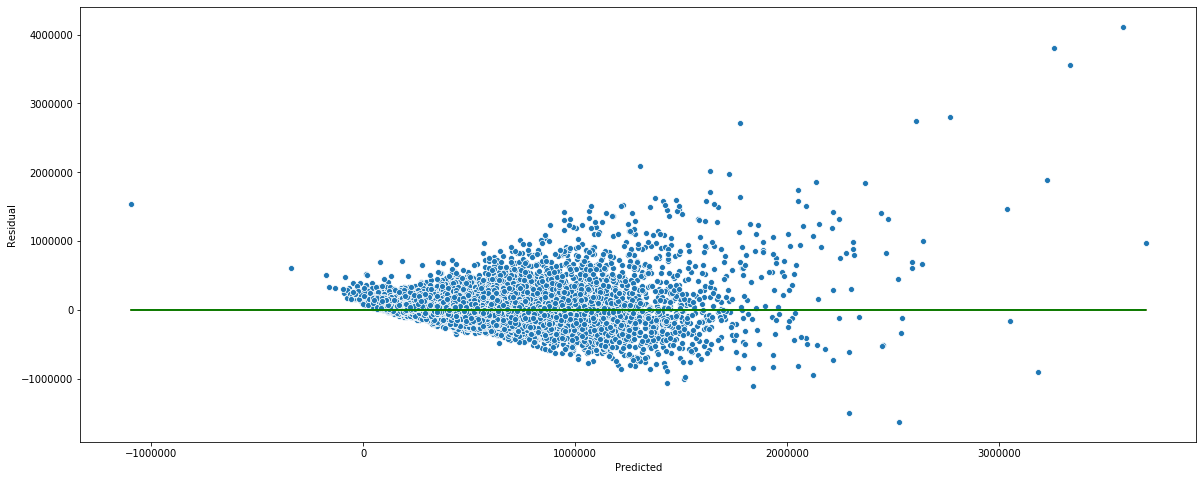

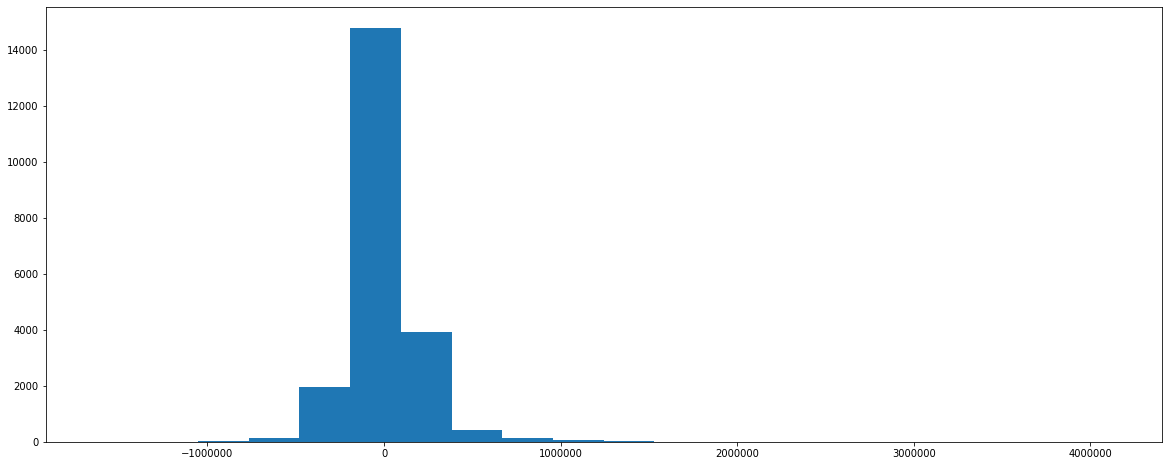

In [61]:
# Second attempt : L1-Regularization to remove uninformative features
lasso = Lasso(alpha=0.2)
pipe2 = make_pipeline(scaler, lasso)

pipe2 = model_evaluate(pipe2)
y_pred = model_predict(pipe2)
plot_residuals()

In [62]:
try_cols = ['sqft_living','grade','sqft_above','bathrooms','view','sqft_basement','zipcode','lat','long',
            'bedrooms']
X = df[try_cols].copy()

scaler = RobustScaler()
lr = LinearRegression()
pipe1 = make_pipeline(scaler, lr)

pipe1 = model_evaluate(pipe1) # returns a list of pipelines
y_pred = model_predict(pipe1)
plot_residuals()

------------------------------------------------------------
test_r2 :
					 0.6511 +/- 0.0151
test_neg_mean_absolute_error :
					 -135901.9780 +/- 2870.2832

------------------------------------------------------------
test_neg_mean_squared_error :
					 -46713503373.1595 +/- 2250734613.9229


IndexError: index 10 is out of bounds for axis 0 with size 10

In [53]:
try_cols = ['sqft_living','grade','sqft_above','bathrooms','view','sqft_basement','zipcode','lat','long',
            'bedrooms','waterfront','floors']
X = df[try_cols].copy()


X['lon_times_lan'] = X['lat'] * X['long']
X['lon_times_lan_sq'] = X['lon_times_lan']**2
X['lon_times_lan_cubed'] = X['lon_times_lan']**3
X['bedroom_times_bathroom'] = X['bathrooms'] * X['bedrooms']
X['bedroom_times_bathroom_sq'] = X['bedroom_times_bathroom']**2
X['bedroom_times_bathroom_cubed'] = X['bedroom_times_bathroom']**3

X['lat_sq'] = X['lat']**2
X['long_sq'] = X['long']**2
X['lat_cube'] = X['lat']**3
X['long_sq'] = X['long']**3


scaler = RobustScaler()
lr = LinearRegression()
pipe1 = make_pipeline(scaler, lr)

# scores = cross_val_score(pipe1, X, y, cv=5, scoring='neg_root_mean_squared_error')
# print("RMSE:", -scores.mean(), "+/-", scores.std())

scores = cross_val_score(pipe1, X, y, cv=5, scoring='r2')
print("R^2:", scores.mean(), "+/-", scores.std())

R^2: 0.7409859665954468 +/- 0.00589386398253804
